<a href="https://colab.research.google.com/github/SHAIKHHUZEFA/basic-django-project/blob/master/analysis%20on_Iris_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
















### Multi-class Classification

Data with more than 2 unique labels

#### Iris Flower Species Prediction

Iris Flower Species:
1. Setosa
2. Versicolor
3. Virginica



In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('Iris.csv')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [0]:
data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [0]:
features = data.iloc[:,[1,2,3,4]].values
label = data.iloc[:,5].values

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=10)

In [0]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
#Quality
#1. Generalization
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.975
1.0


In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data.Species,model.predict(features)))
print(classification_report(data.Species,model.predict(features)))

[[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.94      0.97        50
 Iris-virginica       0.94      1.00      0.97        50

      micro avg       0.98      0.98      0.98       150
      macro avg       0.98      0.98      0.98       150
   weighted avg       0.98      0.98      0.98       150



In [0]:
 model.score(features,label)

0.98

In [0]:
labelNumeric = data.Species.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

In [0]:
finalLabel=data.Species.values

In [0]:
finalLabel = labelNumeric.values

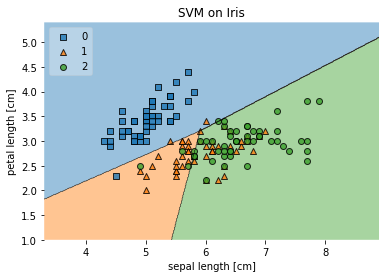

In [0]:
#label
#from sklearn.svm import SVC
#model1 = SVC(kernel='linear')
#model1.fit(features[:,0:2],finalLabel)

#from sklearn.neighbors import KNeighborsClassifier
#model1 = KNeighborsClassifier(n_neighbors=5)
#model1.fit(features[:,0:2],finalLabel)

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(features[:,0:2],finalLabel)

import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
# Plotting decision regions
plot_decision_regions(features[:,0:2], labelNumeric.values, clf=model1, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [0]:
#To install mlxtend
# In anaconda prompt, type the following command
# pip install mlxtend